# **COLLECTIVE ACTION**

In [593]:
# Import required libraries
import pandas as pd
import numpy as np

In [594]:
# Access folder containing acitivity data
data_folder = "/content/drive/Shareddrives/OSM-ODECO/HOTOSM/dataforanalysis/"
in_drive = True  # True to mount a drive while working in Google Colab
if in_drive:
    from google.colab import drive
    drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [595]:
# Read file containing all project states
total=pd.read_csv(data_folder +"splits_invalidations.csv")
total['projectId'] = total['taskId'].str.split('_').str[0]
total['task'] = total['taskId'].str.split('_').str[1]
total['projectId']=total['projectId'].astype(str).astype(int)
total['task']=total['task'].astype(str).astype(int)
total

,taskId,action,actionBy,start,complete,username,mappingLevel,projectId,task
0,11875_33,LOCKED_FOR_MAPPING,fajarramadhana,2021-12-01 04:45:26.341502+00:00,2021-12-01 04:46:29.933460+00:00,fajarramadhana,BEGINNER,11875,33
1,11875_72,LOCKED_FOR_MAPPING,fajarramadhana,2021-12-01 04:46:37.414302+00:00,2021-12-01 04:47:15.559799+00:00,fajarramadhana,BEGINNER,11875,72
2,11875_85,LOCKED_FOR_MAPPING,fajarramadhana,2021-12-01 04:47:24.839519+00:00,2021-12-01 04:49:46.389017+00:00,fajarramadhana,BEGINNER,11875,85
3,11875_42,LOCKED_FOR_MAPPING,fajarramadhana,2021-12-01 04:49:53.855180+00:00,2021-12-01 04:53:22.263015+00:00,fajarramadhana,BEGINNER,11875,42
4,11875_42,MAPPED,fajarramadhana,2021-12-01 04:53:22.260095+00:00,2021-12-01 04:53:22.260095+00:00,fajarramadhana,BEGINNER,11875,42
...,...,...,...,...,...,...,...,...,...
1853069,15797_70,LOCKED_FOR_MAPPING,Evan Pearson,2023-11-27 19:10:46.521133+00:00,2023-11-27 19:11:27.473306+00:00,Evan Pearson,BEGINNER,15797,70
1853070,15797_70,LOCKED_FOR_MAPPING,karabarca29,2023-11-27 19:16:33.278954+00:00,2023-11-27 19:33:55.401159+00:00,karabarca29,BEGINNER,15797,70
1853071,15797_70,MAPPED,karabarca29,2023-11-27 19:33:55.397329+00:00,2023-11-27 19:33:55.397329+00:00,karabarca29,BEGINNER,15797,70
1853072,15797_70,LOCKED_FOR_VALIDATION,JuanMelo,2023-11-30 12:26:37.896972+00:00,2023-11-30 14:31:20.822475+00:00,JuanMelo,ADVANCED,15797,70


In [596]:
#Read file containing project info
projects=pd.read_excel(data_folder +"projects.xlsx")
projects

,projectId,country,country_code,difficulty,priority,totalContributors,totalTasks,quantile,region
0,11907,Guatemala,GT,MODERATE,HIGH,122,661,Q4,LAC
1,12018,Guatemala,GT,MODERATE,HIGH,63,317,Q3,LAC
2,12171,Brazil,BR,MODERATE,HIGH,288,873,Q4,LAC
3,12192,Somalia,SO,MODERATE,HIGH,19,28,Q1,ESA
4,12193,Somalia,SO,MODERATE,HIGH,9,28,Q1,ESA
...,...,...,...,...,...,...,...,...,...
741,15432,Chad,TD,CHALLENGING,HIGH,23,133,Q2,WNA
742,12527,Tanzania,TZ,CHALLENGING,LOW,44,639,Q4,ESA
743,14613,Democratic Republic of the Congo,CD,CHALLENGING,LOW,8,101,Q1,ESA
744,13544,Brazil,BR,CHALLENGING,MEDIUM,2,48,Q1,LAC


In [597]:
# Segregate log containing different types of task states
splits=total[total["action"].isin(['SPLIT'])].taskId.unique()
invalidated=total[total["action"].isin(['INVALIDATED'])].taskId.unique()
splitsinvalidated = (set(list(splits)) & set(list(invalidated)))

In [598]:
# All states
# Figure 5. Overview of the number of contributors per task
len(total.taskId.unique())

312289

In [599]:
pd.DataFrame(total.groupby("taskId")["actionBy"].nunique()).describe()

,actionBy
count,312289.000000
mean,3.111320
std,3.000364
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,64.000000


In [600]:
# All states mapping phase
pd.DataFrame(total[total["action"].isin(['LOCKED_FOR_MAPPING','MAPPED','AUTO_UNLOCKED_FOR_MAPPING','SPLIT','BADIMAGERY'])].groupby("taskId")["actionBy"].nunique()).describe()

,actionBy
count,312287.000000
mean,2.031791
std,2.793679
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,60.000000


In [601]:
# All states validation phase
pd.DataFrame(total[total["action"].isin(['LOCKED_FOR_VALIDATION','INVALIDATED','VALIDATED','AUTO_UNLOCKED_FOR_VALIDATION'])].groupby("taskId")["actionBy"].nunique()).describe()

,actionBy
count,312107.000000
mean,1.127242
std,0.476404
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,10.000000


In [602]:
# Not split not invalidated
# Figure 5. Overview of the number of contributors per task
len(total[~total["taskId"].isin(list(invalidated)+list(splits))].taskId.unique())/312289

0.8426969890069775

In [603]:
pd.DataFrame(total[~total["taskId"].isin(list(invalidated)+list(splits))].groupby("taskId")["actionBy"].nunique()).describe()

,actionBy
count,263165.000000
mean,2.396819
std,0.941555
min,1.000000
25%,2.000000
50%,2.000000
75%,2.000000
max,32.000000


In [604]:
# Not split not invalidated mapping phase
pd.DataFrame(total[~total["taskId"].isin(list(invalidated)+list(splits))][total["action"].isin(['LOCKED_FOR_MAPPING','MAPPED','AUTO_UNLOCKED_FOR_MAPPING','SPLIT','BADIMAGERY'])].groupby("taskId")["actionBy"].nunique()).describe()

<ipython-input-604-a31c07acf7a4>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pd.DataFrame(total[~total["taskId"].isin(list(invalidated)+list(splits))][total["action"].isin(['LOCKED_FOR_MAPPING','MAPPED','AUTO_UNLOCKED_FOR_MAPPING','SPLIT','BADIMAGERY'])].groupby("taskId")["actionBy"].nunique()).describe()


,actionBy
count,263163.000000
mean,1.371587
std,0.911937
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,31.000000


In [605]:
# Not split not invalidated validation phase
pd.DataFrame(total[~total["taskId"].isin(list(invalidated)+list(splits))][total["action"].isin(['LOCKED_FOR_VALIDATION','INVALIDATED','VALIDATED','AUTO_UNLOCKED_FOR_VALIDATION'])].groupby("taskId")["actionBy"].nunique()).describe()

<ipython-input-605-ec8cf893acaa>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pd.DataFrame(total[~total["taskId"].isin(list(invalidated)+list(splits))][total["action"].isin(['LOCKED_FOR_VALIDATION','INVALIDATED','VALIDATED','AUTO_UNLOCKED_FOR_VALIDATION'])].groupby("taskId")["actionBy"].nunique()).describe()


,actionBy
count,262994.000000
mean,1.041982
std,0.212748
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,6.000000


In [606]:
# Splits
# Figure 5. Overview of the number of contributors per task
len(total[total["taskId"].isin(splits)].taskId.unique())/312289

0.1352048903419589

In [607]:
pd.DataFrame(total[total["taskId"].isin(splits)].groupby("taskId")["actionBy"].nunique()).describe()

,actionBy
count,42223.000000
mean,7.218672
std,6.242817
min,1.000000
25%,3.000000
50%,5.000000
75%,9.000000
max,64.000000


In [608]:
# Splits mapping phase
pd.DataFrame(total[total["taskId"].isin(splits)][total["action"].isin(['LOCKED_FOR_MAPPING','MAPPED','AUTO_UNLOCKED_FOR_MAPPING','SPLIT','BADIMAGERY'])].groupby("taskId")["actionBy"].nunique()).describe()

<ipython-input-608-b2d3b0dc04e9>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pd.DataFrame(total[total["taskId"].isin(splits)][total["action"].isin(['LOCKED_FOR_MAPPING','MAPPED','AUTO_UNLOCKED_FOR_MAPPING','SPLIT','BADIMAGERY'])].groupby("taskId")["actionBy"].nunique()).describe()


,actionBy
count,42223.000000
mean,5.903868
std,5.776121
min,1.000000
25%,2.000000
50%,4.000000
75%,8.000000
max,60.000000


In [609]:
# Splits validation phase
pd.DataFrame(total[total["taskId"].isin(splits)][total["action"].isin(['LOCKED_FOR_VALIDATION','INVALIDATED','VALIDATED','AUTO_UNLOCKED_FOR_VALIDATION'])].groupby("taskId")["actionBy"].nunique()).describe()

<ipython-input-609-c3cb484df79d>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pd.DataFrame(total[total["taskId"].isin(splits)][total["action"].isin(['LOCKED_FOR_VALIDATION','INVALIDATED','VALIDATED','AUTO_UNLOCKED_FOR_VALIDATION'])].groupby("taskId")["actionBy"].nunique()).describe()


,actionBy
count,42212.000000
mean,1.540249
std,1.001581
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,10.000000


In [610]:
# Invalidated
# Figure 5. Overview of the number of contributors per task
len(total[total["taskId"].isin(invalidated)].taskId.unique())/312289

0.06324270147203392

In [611]:
pd.DataFrame(total[total["taskId"].isin(invalidated)].groupby("taskId")["actionBy"].nunique()).describe()

,actionBy
count,19750.000000
mean,9.951392
std,7.418493
min,2.000000
25%,5.000000
50%,7.000000
75%,13.000000
max,64.000000


In [612]:
# Invalidated mapping phase
pd.DataFrame(total[total["taskId"].isin(invalidated)][total["action"].isin(['LOCKED_FOR_MAPPING','MAPPED','AUTO_UNLOCKED_FOR_MAPPING','SPLIT','BADIMAGERY'])].groupby("taskId")["actionBy"].nunique()).describe()

<ipython-input-612-02b70733898e>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pd.DataFrame(total[total["taskId"].isin(invalidated)][total["action"].isin(['LOCKED_FOR_MAPPING','MAPPED','AUTO_UNLOCKED_FOR_MAPPING','SPLIT','BADIMAGERY'])].groupby("taskId")["actionBy"].nunique()).describe()


,actionBy
count,19750.000000
mean,8.061975
std,6.956947
min,1.000000
25%,3.000000
50%,6.000000
75%,11.000000
max,60.000000


In [613]:
# Invalidated validation phase
pd.DataFrame(total[total["taskId"].isin(invalidated)][total["action"].isin(['LOCKED_FOR_VALIDATION','INVALIDATED','VALIDATED','AUTO_UNLOCKED_FOR_VALIDATION'])].groupby("taskId")["actionBy"].nunique()).describe()

<ipython-input-613-014cfd05bba5>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pd.DataFrame(total[total["taskId"].isin(invalidated)][total["action"].isin(['LOCKED_FOR_VALIDATION','INVALIDATED','VALIDATED','AUTO_UNLOCKED_FOR_VALIDATION'])].groupby("taskId")["actionBy"].nunique()).describe()


,actionBy
count,19750.000000
mean,2.317468
std,1.145134
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,10.000000


In [614]:
# Split and invalidated
# Figure 5. Overview of the number of contributors per task
len(total[total["taskId"].isin(splitsinvalidated)].taskId.unique())/312289

0.04114458082097032

In [615]:
0.04114458082097032*312289

12849.0

In [616]:
pd.DataFrame(total[total["taskId"].isin(splitsinvalidated)].groupby("taskId")["actionBy"].nunique()).describe()

,actionBy
count,12849.000000
mean,12.488287
std,7.867810
min,2.000000
25%,7.000000
50%,11.000000
75%,16.000000
max,64.000000


In [617]:
# Split and invalidated mapping phase
pd.DataFrame(total[total["taskId"].isin(splitsinvalidated)][total["action"].isin(['LOCKED_FOR_MAPPING','MAPPED','AUTO_UNLOCKED_FOR_MAPPING','SPLIT','BADIMAGERY'])].groupby("taskId")["actionBy"].nunique()).describe()

<ipython-input-617-1aa7e735b0a2>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pd.DataFrame(total[total["taskId"].isin(splitsinvalidated)][total["action"].isin(['LOCKED_FOR_MAPPING','MAPPED','AUTO_UNLOCKED_FOR_MAPPING','SPLIT','BADIMAGERY'])].groupby("taskId")["actionBy"].nunique()).describe()


,actionBy
count,12849.000000
mean,10.502919
std,7.328169
min,1.000000
25%,5.000000
50%,9.000000
75%,14.000000
max,60.000000


In [618]:
# Split and invalidated validation phase
pd.DataFrame(total[total["taskId"].isin(splitsinvalidated)][total["action"].isin(['LOCKED_FOR_VALIDATION','INVALIDATED','VALIDATED','AUTO_UNLOCKED_FOR_VALIDATION'])].groupby("taskId")["actionBy"].nunique()).describe()

<ipython-input-618-7a07ed918424>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pd.DataFrame(total[total["taskId"].isin(splitsinvalidated)][total["action"].isin(['LOCKED_FOR_VALIDATION','INVALIDATED','VALIDATED','AUTO_UNLOCKED_FOR_VALIDATION'])].groupby("taskId")["actionBy"].nunique()).describe()


,actionBy
count,12849.000000
mean,2.568449
std,1.238649
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,10.000000


# Tasks with multiple contributors en the mapping phase

In [619]:
# Identify tasks with mupliple contributors in the mapping phase excluding splits and invalidations
contributorsmapping = pd.DataFrame(total[~total["taskId"].isin(list(invalidated)+list(splits))][total["action"].isin(['LOCKED_FOR_MAPPING','AUTO_UNLOCKED_FOR_MAPPING'])].groupby("taskId")["actionBy"].nunique()).reset_index()
contributorsmapping.columns = ["taskId","count"]
listtasksmorecontributors = contributorsmapping[contributorsmapping["count"]!=1].taskId.unique().tolist()
contributorsmapping['projectId'] = contributorsmapping['taskId'].str.split('_').str[0]
contributorsmapping['task'] = contributorsmapping['taskId'].str.split('_').str[1]
contributorsmapping['projectId']=contributorsmapping['projectId'].astype(str).astype(int)
contributorsmapping['task']=contributorsmapping['task'].astype(str).astype(int)
contributorsmapping=contributorsmapping.merge(projects, on="projectId")
totaltasks = pd.DataFrame(contributorsmapping.groupby("projectId")["taskId"].count()).reset_index()
taskswithmorecontributors = pd.DataFrame(contributorsmapping[contributorsmapping["count"]!=1].groupby("projectId")["taskId"].count()).reset_index()
totaltasks = totaltasks.merge(taskswithmorecontributors, on="projectId", how="left")
totaltasks = totaltasks.fillna(0)
totaltasks['percentagetasksmorecontributors'] = totaltasks.taskId_y/totaltasks.taskId_x*100
pivot=totaltasks.merge(projects, on="projectId")
pivot['priority'] = pivot['priority'].map({'LOW': '1. LOW', 'MEDIUM': '2. MEDIUM', 'HIGH': '3. HIGH', 'URGENT': '4. URGENT'})
pivot


<ipython-input-619-8a5095414b0a>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  contributorsmapping = pd.DataFrame(total[~total["taskId"].isin(list(invalidated)+list(splits))][total["action"].isin(['LOCKED_FOR_MAPPING','AUTO_UNLOCKED_FOR_MAPPING'])].groupby("taskId")["actionBy"].nunique()).reset_index()


,projectId,taskId_x,taskId_y,percentagetasksmorecontributors,country,country_code,difficulty,priority,totalContributors,totalTasks,quantile,region
0,11875,74,31.0,41.891892,Nepal,NP,EASY,2. MEDIUM,9,89,Q1,AP
1,11884,131,77.0,58.778626,Philippines,PH,EASY,2. MEDIUM,65,194,Q2,AP
2,11890,702,145.0,20.655271,Guatemala,GT,EASY,1. LOW,96,734,Q4,LAC
3,11891,595,76.0,12.773109,Guatemala,GT,EASY,1. LOW,27,606,Q4,LAC
4,11892,582,215.0,36.941581,Nigeria,NG,EASY,2. MEDIUM,137,600,Q4,WNA
...,...,...,...,...,...,...,...,...,...,...,...,...
738,15689,60,16.0,26.666667,Malawi,MW,MODERATE,2. MEDIUM,38,102,Q1,ESA
739,15705,246,96.0,39.024390,Ghana,GH,EASY,3. HIGH,41,258,Q2,WNA
740,15744,213,8.0,3.755869,Ghana,GH,EASY,3. HIGH,15,213,Q2,WNA
741,15745,324,110.0,33.950617,Ghana,GH,MODERATE,4. URGENT,110,396,Q3,WNA


In [620]:
pd.pivot_table(pivot, values='percentagetasksmorecontributors', index=['difficulty'],columns=['priority'], aggfunc="mean").T

difficulty,CHALLENGING,EASY,MODERATE
priority,,,
1. LOW,4.126366,26.944467,16.180338
2. MEDIUM,0.000000,29.467580,12.146718
3. HIGH,16.369594,33.330262,27.123272
4. URGENT,44.827586,37.665523,38.021507


<Axes: xlabel='priority'>

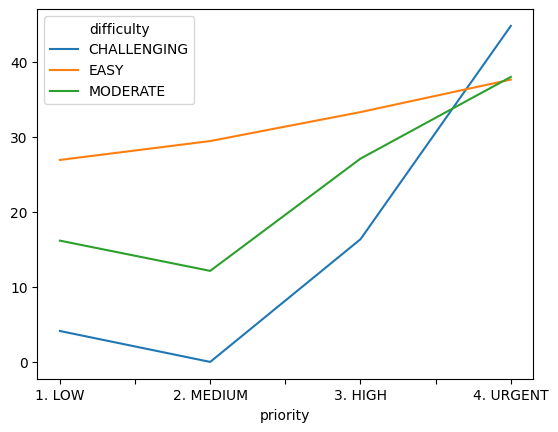

In [621]:
# Plot average proportion of tasks per project with mupliple contributors in the mapping phase excluding splits and invalidations
# Figure 6. Tasks mapped by more than one contributor by difficulty and priority -average % of total tasks per project
pd.pivot_table(pivot, values='percentagetasksmorecontributors', index=['difficulty'],columns=['priority'], aggfunc="mean").T.plot()

Fig. 7. Mapping level profile of locked and auto unlocked states for tasks that were mapped by more than one contributor excluding splits

In [622]:
# Set of locked for mapping and auto unlocked for mapping states
mappings=total[~total["taskId"].isin(list(invalidated)+list(splits))][total["action"].isin(['LOCKED_FOR_MAPPING','AUTO_UNLOCKED_FOR_MAPPING'])]
mappings=mappings[mappings["taskId"].isin(listtasksmorecontributors)]
mappings["start"]=pd.to_datetime(mappings["start"])
mappings["complete"]=pd.to_datetime(mappings["complete"])
mappings["duration"]=(mappings.complete-mappings.start).astype('timedelta64[s]')
mappings=mappings.merge(projects, on="projectId")
mappings=mappings.sort_values(["taskId","start"]).reset_index()
mappings["previousactionBy"]=mappings["actionBy"].shift(1)
mappings["previoustaskId"]=mappings["taskId"].shift(1)

# Identify consecutive states made by the same contributor
bloblist=[]
blob=0
for index, row in mappings.iterrows():
  if((row["previousactionBy"]==row["actionBy"]) & (row["previoustaskId"]==row["taskId"])):
    bloblist.append(blob)
  else:
    blob=blob+1
    bloblist.append(blob)
mappings["blob"]=bloblist

# Merge consecutive states made by the same contributor
total_blobs=pd.DataFrame(mappings.groupby(["blob"])["duration"].sum()).reset_index()
total_blobs.columns=["blob","duration_blob"]
mappings=mappings.merge(total_blobs[["blob","duration_blob"]], on="blob", how="left")
mappings = mappings.drop_duplicates(subset=['blob'])

# Calculate the proportion of mapping time devoted for each state in a task
total_duration=pd.DataFrame(mappings.groupby(["taskId"])["duration_blob"].sum()).reset_index()
total_duration.columns=["taskId","total_duration"]
mappings=mappings.merge(total_duration[['taskId', 'total_duration']], on="taskId", how="left")
mappings["durationper"]=mappings["duration_blob"]/mappings["total_duration"]*100
mappings

<ipython-input-622-9e79256292ac>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mappings=total[~total["taskId"].isin(list(invalidated)+list(splits))][total["action"].isin(['LOCKED_FOR_MAPPING','AUTO_UNLOCKED_FOR_MAPPING'])]


,index,taskId,action,actionBy,start,complete,username,mappingLevel,projectId,task,...,totalContributors,totalTasks,quantile,region,previousactionBy,previoustaskId,blob,duration_blob,total_duration,durationper
0,10,11875_11,LOCKED_FOR_MAPPING,PraKH,2021-12-01 10:24:51.432903+00:00,2021-12-01 10:25:14.325466+00:00,PraKH,ADVANCED,11875,11,...,9,89,Q1,AP,None,None,1,0 days 00:00:22,0 days 00:04:10,8.800000
1,15,11875_11,LOCKED_FOR_MAPPING,PraKH2,2021-12-02 07:36:45.270405+00:00,2021-12-02 07:37:20.962596+00:00,PraKH2,ADVANCED,11875,11,...,9,89,Q1,AP,PraKH,11875_11,2,0 days 00:03:48,0 days 00:04:10,91.200000
2,46,11875_13,AUTO_UNLOCKED_FOR_MAPPING,PraKH,2021-12-16 01:36:51.009866+00:00,2021-12-16 03:36:51.009866+00:00,PraKH,ADVANCED,11875,13,...,9,89,Q1,AP,PraKH2,11875_11,3,0 days 02:00:00,0 days 05:56:53,33.624434
3,47,11875_13,LOCKED_FOR_MAPPING,PraKH2,2021-12-16 04:24:18.434122+00:00,2021-12-16 04:41:16.849306+00:00,PraKH2,ADVANCED,11875,13,...,9,89,Q1,AP,PraKH,11875_13,4,0 days 00:16:58,0 days 05:56:53,4.754121
4,53,11875_13,AUTO_UNLOCKED_FOR_MAPPING,PraKH,2021-12-16 07:33:46.475897+00:00,2021-12-16 09:33:46.475897+00:00,PraKH,ADVANCED,11875,13,...,9,89,Q1,AP,PraKH2,11875_13,5,0 days 03:39:55,0 days 05:56:53,61.621445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156686,168645,15797_76,LOCKED_FOR_MAPPING,Yessica López,2023-11-16 17:36:37.287700+00:00,2023-11-16 17:37:32.185375+00:00,Yessica López,BEGINNER,15797,76,...,165,76,Q1,LAC,LiamColeman,15797_76,156687,0 days 00:00:54,0 days 00:16:23,5.493388
156687,168671,15797_76,LOCKED_FOR_MAPPING,Ronnie Kaplan,2023-11-16 20:22:07.424004+00:00,2023-11-16 20:22:57.873461+00:00,Ronnie Kaplan,BEGINNER,15797,76,...,165,76,Q1,LAC,Yessica López,15797_76,156688,0 days 00:00:50,0 days 00:16:23,5.086470
156688,168520,15797_8,LOCKED_FOR_MAPPING,Barajasss,2023-11-13 23:26:22.181371+00:00,2023-11-13 23:26:37.240148+00:00,Barajasss,INTERMEDIATE,15797,8,...,165,76,Q1,LAC,Ronnie Kaplan,15797_76,156689,0 days 00:00:15,0 days 00:02:02,12.295082
156689,168531,15797_8,LOCKED_FOR_MAPPING,AJM90,2023-11-14 21:44:27.353311+00:00,2023-11-14 21:46:02.358107+00:00,AJM90,BEGINNER,15797,8,...,165,76,Q1,LAC,Barajasss,15797_8,156690,0 days 00:01:35,0 days 00:02:02,77.868852


In [623]:
groups=mappings[['taskId','mappingLevel',"durationper","duration"]].groupby(['taskId']).agg({'durationper':"first",'duration':"mean",'mappingLevel': ','.join}).reset_index().groupby(["mappingLevel"]).agg({'taskId':"count",'durationper': 'mean','duration':"median"}).reset_index().sort_values(by=["taskId"], ascending=False)
groups["%"]=round(groups["taskId"]/groups.taskId.sum()*100,1)
groups.head(10)

,mappingLevel,taskId,durationper,duration,%
501,"BEGINNER,BEGINNER",16673,51.986253,0 days 00:03:29,28.3
348,"BEGINNER,ADVANCED",7250,50.175358,0 days 00:04:41,12.3
0,"ADVANCED,ADVANCED",7122,43.455895,0 days 00:04:10,12.1
589,"BEGINNER,BEGINNER,BEGINNER",4315,38.345220,0 days 00:05:18,7.3
150,"ADVANCED,BEGINNER",2376,43.370711,0 days 00:04:11,4.0
502,"BEGINNER,BEGINNER,ADVANCED",1696,33.909528,0 days 00:08:44,2.9
877,"BEGINNER,INTERMEDIATE",1637,52.371236,0 days 00:05:01,2.8
632,"BEGINNER,BEGINNER,BEGINNER,BEGINNER",1392,30.328417,0 days 00:06:50,2.4
969,"INTERMEDIATE,ADVANCED",1263,51.114704,0 days 00:05:16,2.1
1028,"INTERMEDIATE,BEGINNER",1260,47.445447,0 days 00:02:57,2.1


In [624]:
groups=mappings[mappings["difficulty"]=="EASY"][['taskId','mappingLevel',"durationper","duration"]].groupby(['taskId']).agg({'durationper':"first",'duration':"mean",'mappingLevel': ','.join}).reset_index().groupby(["mappingLevel"]).agg({'taskId':"count",'durationper': 'mean','duration':"median"}).reset_index().sort_values(by=["taskId"], ascending=False)
groups["%"]=round(groups["taskId"]/groups.taskId.sum()*100,1)
groups.head(10)

,mappingLevel,taskId,durationper,duration,%
347,"BEGINNER,BEGINNER",15709,51.845573,0 days 00:03:17,33.0
229,"BEGINNER,ADVANCED",6079,50.112799,0 days 00:03:58,12.8
414,"BEGINNER,BEGINNER,BEGINNER",4036,38.437676,0 days 00:04:49,8.5
0,"ADVANCED,ADVANCED",3551,42.283777,0 days 00:03:04,7.4
76,"ADVANCED,BEGINNER",2027,43.227303,0 days 00:03:35,4.3
348,"BEGINNER,BEGINNER,ADVANCED",1420,34.480199,0 days 00:07:05,3.0
651,"BEGINNER,INTERMEDIATE",1417,52.966601,0 days 00:04:26,3.0
451,"BEGINNER,BEGINNER,BEGINNER,BEGINNER",1292,30.592695,0 days 00:05:55,2.7
762,"INTERMEDIATE,BEGINNER",1146,47.546025,0 days 00:02:45,2.4
722,"INTERMEDIATE,ADVANCED",943,52.616183,0 days 00:04:36,2.0


In [625]:
groups=mappings[mappings["difficulty"]=="MODERATE"][['taskId','mappingLevel',"durationper","duration"]].groupby(['taskId']).agg({'durationper':"first",'duration':"mean",'mappingLevel': ','.join}).reset_index().groupby(["mappingLevel"]).agg({'taskId':"count",'durationper': 'mean','duration':"median"}).reset_index().sort_values(by=["taskId"], ascending=False)
groups["%"]=round(groups["taskId"]/groups.taskId.sum()*100,1)
groups.head(10)

,mappingLevel,taskId,durationper,duration,%
0,"ADVANCED,ADVANCED",3535,44.665619,0 days 00:05:29,31.8
223,"BEGINNER,ADVANCED",1171,50.500123,0 days 00:10:09,10.5
301,"BEGINNER,BEGINNER",964,54.278724,0 days 00:09:41,8.7
1,"ADVANCED,ADVANCED,ADVANCED",688,29.652363,0 days 00:08:10,6.2
112,"ADVANCED,BEGINNER",349,44.203628,0 days 00:10:47,3.1
515,"INTERMEDIATE,ADVANCED",317,46.686752,0 days 00:08:22,2.8
193,"ADVANCED,INTERMEDIATE",281,35.200742,0 days 00:03:46,2.5
344,"BEGINNER,BEGINNER,BEGINNER",279,37.007769,0 days 00:26:19,2.5
302,"BEGINNER,BEGINNER,ADVANCED",276,30.973465,0 days 00:18:30,2.5
470,"BEGINNER,INTERMEDIATE",220,48.536544,0 days 00:11:27,2.0


In [626]:
groups=mappings[mappings["difficulty"]=="CHALLENGING"][['taskId','mappingLevel',"durationper","duration"]].groupby(['taskId']).agg({'durationper':"first",'duration':"mean",'mappingLevel': ','.join}).reset_index().groupby(["mappingLevel"]).agg({'taskId':"count",'durationper': 'mean','duration':"median"}).reset_index().sort_values(by=["taskId"], ascending=False)
groups["%"]=round(groups["taskId"]/groups.taskId.sum()*100,1)
groups.head(10)

,mappingLevel,taskId,durationper,duration,%
0,"ADVANCED,ADVANCED",36,24.038636,0 days 00:08:38,78.3
2,"ADVANCED,INTERMEDIATE",4,63.859961,0 days 00:33:27,8.7
4,"INTERMEDIATE,ADVANCED",3,47.036645,0 days 00:11:40,6.5
1,"ADVANCED,ADVANCED,ADVANCED,ADVANCED",2,0.866091,0 days 00:34:52,4.3
3,"ADVANCED,INTERMEDIATE,ADVANCED",1,20.729092,0 days 00:07:46,2.2


In [627]:
groups=mappings[mappings["priority"]=="LOW"][['taskId','mappingLevel',"durationper","duration"]].groupby(['taskId']).agg({'durationper':"first",'duration':"mean",'mappingLevel': ','.join}).reset_index().groupby(["mappingLevel"]).agg({'taskId':"count",'durationper': 'mean','duration':"median"}).reset_index().sort_values(by=["taskId"], ascending=False)
groups["%"]=round(groups["taskId"]/groups.taskId.sum()*100,1)
groups.head(10)

,mappingLevel,taskId,durationper,duration,%
294,"BEGINNER,BEGINNER",10314,53.985160,0 days 00:02:49,33.3
0,"ADVANCED,ADVANCED",4063,45.670784,0 days 00:02:52,13.1
219,"BEGINNER,ADVANCED",2915,51.775369,0 days 00:03:41,9.4
335,"BEGINNER,BEGINNER,BEGINNER",2714,39.713915,0 days 00:04:34,8.8
93,"ADVANCED,BEGINNER",1134,44.169485,0 days 00:03:33,3.7
355,"BEGINNER,BEGINNER,BEGINNER,BEGINNER",872,30.593004,0 days 00:05:59,2.8
486,"BEGINNER,INTERMEDIATE",854,55.259086,0 days 00:03:54,2.8
563,"INTERMEDIATE,BEGINNER",692,49.325701,0 days 00:02:42,2.2
295,"BEGINNER,BEGINNER,ADVANCED",556,35.110616,0 days 00:07:55,1.8
1,"ADVANCED,ADVANCED,ADVANCED",500,32.813674,0 days 00:07:52,1.6


In [628]:
groups=mappings[mappings["priority"]=="MEDIUM"][['taskId','mappingLevel',"durationper","duration"]].groupby(['taskId']).agg({'durationper':"first",'duration':"mean",'mappingLevel': ','.join}).reset_index().groupby(["mappingLevel"]).agg({'taskId':"count",'durationper': 'mean','duration':"median"}).reset_index().sort_values(by=["taskId"], ascending=False)
groups["%"]=round(groups["taskId"]/groups.taskId.sum()*100,1)
groups.head(10)

,mappingLevel,taskId,durationper,duration,%
181,"BEGINNER,BEGINNER",3976,48.837346,0 days 00:04:45,26.7
123,"BEGINNER,ADVANCED",1991,51.575138,0 days 00:05:28,13.4
0,"ADVANCED,ADVANCED",1613,41.315805,0 days 00:05:10,10.8
215,"BEGINNER,BEGINNER,BEGINNER",895,37.315188,0 days 00:05:32,6.0
49,"ADVANCED,BEGINNER",819,42.494427,0 days 00:04:33,5.5
182,"BEGINNER,BEGINNER,ADVANCED",516,34.388990,0 days 00:09:47,3.5
331,"BEGINNER,INTERMEDIATE",398,51.807535,0 days 00:08:25,2.7
397,"INTERMEDIATE,BEGINNER",360,42.937381,0 days 00:02:46,2.4
372,"INTERMEDIATE,ADVANCED",351,47.219425,0 days 00:05:05,2.4
1,"ADVANCED,ADVANCED,ADVANCED",327,28.000291,0 days 00:05:27,2.2


In [629]:
groups=mappings[mappings["priority"]=="HIGH"][['taskId','mappingLevel',"durationper","duration"]].groupby(['taskId']).agg({'durationper':"first",'duration':"mean",'mappingLevel': ','.join}).reset_index().groupby(["mappingLevel"]).agg({'taskId':"count",'durationper': 'mean','duration':"median"}).reset_index().sort_values(by=["taskId"], ascending=False)
groups["%"]=round(groups["taskId"]/groups.taskId.sum()*100,1)
groups.head(10)

,mappingLevel,taskId,durationper,duration,%
90,"BEGINNER,ADVANCED",1775,46.463206,0 days 00:04:26,21.6
154,"BEGINNER,BEGINNER",1568,46.508957,0 days 00:04:28,19.1
0,"ADVANCED,ADVANCED",812,42.155667,0 days 00:06:00,9.9
155,"BEGINNER,BEGINNER,ADVANCED",487,32.175777,0 days 00:06:32,5.9
187,"BEGINNER,BEGINNER,BEGINNER",421,34.256660,0 days 00:06:00,5.1
313,"INTERMEDIATE,ADVANCED",323,50.254255,0 days 00:04:42,3.9
32,"ADVANCED,BEGINNER",292,41.796765,0 days 00:04:57,3.6
285,"BEGINNER,INTERMEDIATE",197,41.739952,0 days 00:03:30,2.4
91,"BEGINNER,ADVANCED,ADVANCED",162,38.282064,0 days 00:06:14,2.0
335,"INTERMEDIATE,BEGINNER",156,48.541768,0 days 00:04:00,1.9


In [630]:
groups=mappings[mappings["priority"]=="URGENT"][['taskId','mappingLevel',"durationper","duration"]].groupby(['taskId']).agg({'durationper':"first",'duration':"mean",'mappingLevel': ','.join}).reset_index().groupby(["mappingLevel"]).agg({'taskId':"count",'durationper': 'mean','duration':"median"}).reset_index().sort_values(by=["taskId"], ascending=False)
groups["%"]=round(groups["taskId"]/groups.taskId.sum()*100,1)
groups.head(10)

,mappingLevel,taskId,durationper,duration,%
202,"BEGINNER,BEGINNER",815,52.589602,0 days 00:05:40,17.0
0,"ADVANCED,ADVANCED",634,39.009357,0 days 00:08:44,13.2
142,"BEGINNER,ADVANCED",569,48.660554,0 days 00:09:06,11.9
244,"BEGINNER,BEGINNER,BEGINNER",285,34.585661,0 days 00:13:05,6.0
358,"BEGINNER,INTERMEDIATE",188,51.586622,0 days 00:07:41,3.9
1,"ADVANCED,ADVANCED,ADVANCED",158,28.392369,0 days 00:10:16,3.3
203,"BEGINNER,BEGINNER,ADVANCED",137,33.392223,0 days 00:17:44,2.9
60,"ADVANCED,BEGINNER",131,45.442914,0 days 00:08:09,2.7
258,"BEGINNER,BEGINNER,BEGINNER,BEGINNER",110,26.950271,0 days 00:28:43,2.3
403,"INTERMEDIATE,ADVANCED",100,44.204091,0 days 00:08:35,2.1


HANDOVER OF WORK

In [631]:
mappings = total[~total["taskId"].isin(list(invalidated)+list(splits))][total["action"].isin(['LOCKED_FOR_MAPPING','AUTO_UNLOCKED_FOR_MAPPING'])]
contributorsmapping = pd.DataFrame(total[~total["taskId"].isin(list(invalidated)+list(splits))][total["action"].isin(['LOCKED_FOR_MAPPING','AUTO_UNLOCKED_FOR_MAPPING'])].groupby("taskId")["actionBy"].nunique()).reset_index()
contributorsmapping.columns = ["taskId","count"]
listtasksmorecontributors = contributorsmapping[contributorsmapping["count"]!=1].taskId.unique().tolist()
mappings['group'] = np.where(mappings['taskId'].isin(listtasksmorecontributors), 1, 0)
mappings['projectId'] = mappings['taskId'].str.split('_').str[0]
mappings['task'] = mappings['taskId'].str.split('_').str[1]
mappings['projectId']=mappings['projectId'].astype(str).astype(int)
mappings['task']=mappings['task'].astype(str).astype(int)
mappings['start'] = np.where(mappings['start']=="2022-06-14 09:28:41+00:00", "2022-06-14 09:28:41.00000+00:00", mappings['start'])
mappings["start"]=pd.to_datetime(mappings["start"])
mappings["complete"]=pd.to_datetime(mappings["complete"])
mappings["duration"]=(mappings.complete-mappings.start).astype('timedelta64[s]')
mappings=mappings.merge(projects, on="projectId")
mappings=mappings.sort_values(["projectId","taskId","start"]).reset_index()
mappings["previousactionBy"]=mappings["actionBy"].shift(1)
mappings["previoustaskId"]=mappings["taskId"].shift(1)

# Identify consecutive states made by the same contributor
bloblist=[]
blob=0
for index, row in mappings.iterrows():
  if((row["previousactionBy"]==row["actionBy"]) & (row["previoustaskId"]==row["taskId"])):
    bloblist.append(blob)
  else:
    blob=blob+1
    bloblist.append(blob)
mappings["blob"]=bloblist

# Merge consecutive states made by the same contributor
total_blobs=pd.DataFrame(mappings.groupby(["blob"])["duration"].sum()).reset_index()
total_blobs.columns=["blob","duration_blob"]
mappings=mappings.merge(total_blobs[["blob","duration_blob"]], on="blob", how="left")
mappings = mappings.drop_duplicates(subset=['blob'])

mappings.sort_values(["projectId","task"]).reset_index()


<ipython-input-631-bc9b4e4b90cc>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mappings = total[~total["taskId"].isin(list(invalidated)+list(splits))][total["action"].isin(['LOCKED_FOR_MAPPING','AUTO_UNLOCKED_FOR_MAPPING'])]
<ipython-input-631-bc9b4e4b90cc>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  contributorsmapping = pd.DataFrame(total[~total["taskId"].isin(list(invalidated)+list(splits))][total["action"].isin(['LOCKED_FOR_MAPPING','AUTO_UNLOCKED_FOR_MAPPING'])].groupby("taskId")["actionBy"].nunique()).reset_index()


,level_0,index,taskId,action,actionBy,start,complete,username,mappingLevel,projectId,...,difficulty,priority,totalContributors,totalTasks,quantile,region,previousactionBy,previoustaskId,blob,duration_blob
0,0,4,11875_1,LOCKED_FOR_MAPPING,PraKH,2021-12-01 05:41:36.406109+00:00,2021-12-01 05:46:20.352965+00:00,PraKH,ADVANCED,11875,...,EASY,MEDIUM,9,89,Q1,AP,None,None,1,0 days 00:04:43
1,22,6,11875_2,LOCKED_FOR_MAPPING,PraKH,2021-12-01 05:49:26.776142+00:00,2021-12-01 05:50:54.829659+00:00,PraKH,ADVANCED,11875,...,EASY,MEDIUM,9,89,Q1,AP,Vivek Dumre,11875_19,17,0 days 00:01:28
2,23,26,11875_2,LOCKED_FOR_MAPPING,PraKH2,2021-12-02 07:28:00.437952+00:00,2021-12-02 07:35:35.558214+00:00,PraKH2,ADVANCED,11875,...,EASY,MEDIUM,9,89,Q1,AP,PraKH,11875_2,18,0 days 00:07:35
3,47,5,11875_3,LOCKED_FOR_MAPPING,PraKH,2021-12-01 05:47:01.037489+00:00,2021-12-01 05:49:10.463734+00:00,PraKH,ADVANCED,11875,...,EASY,MEDIUM,9,89,Q1,AP,PraKH,11875_29,38,0 days 00:02:09
4,69,25,11875_4,LOCKED_FOR_MAPPING,sari de groot,2021-12-02 07:26:56.823336+00:00,2021-12-02 07:28:05.566805+00:00,sari de groot,ADVANCED,11875,...,EASY,MEDIUM,9,89,Q1,AP,PraKH,11875_39,54,0 days 00:01:08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361005,379813,379628,15797_76,LOCKED_FOR_MAPPING,Stephanievanr,2023-11-15 19:06:59.052636+00:00,2023-11-15 19:07:50.850298+00:00,Stephanievanr,ADVANCED,15797,...,MODERATE,URGENT,165,76,Q1,LAC,Paulina Mallorga,15797_76,361002,0 days 00:00:51
361006,379814,379651,15797_76,LOCKED_FOR_MAPPING,Yizhen Yan,2023-11-15 20:18:43.635875+00:00,2023-11-15 20:21:47.691313+00:00,Yizhen Yan,BEGINNER,15797,...,MODERATE,URGENT,165,76,Q1,LAC,Stephanievanr,15797_76,361003,0 days 00:03:04
361007,379815,379683,15797_76,LOCKED_FOR_MAPPING,LiamColeman,2023-11-16 01:10:13.354227+00:00,2023-11-16 01:10:33.203365+00:00,LiamColeman,BEGINNER,15797,...,MODERATE,URGENT,165,76,Q1,LAC,Yizhen Yan,15797_76,361004,0 days 00:00:19
361008,379816,379724,15797_76,LOCKED_FOR_MAPPING,Yessica López,2023-11-16 17:36:37.287700+00:00,2023-11-16 17:37:32.185375+00:00,Yessica López,BEGINNER,15797,...,MODERATE,URGENT,165,76,Q1,LAC,LiamColeman,15797_76,361005,0 days 00:00:54


ALL

In [632]:
# Proportion of mapping states in tasks with more than one mapper
# Fig. 8. Handover of mapping tasks
mappings.group.mean()

0.434035068280657

In [633]:
mappings[mappings['mappingLevel']=="BEGINNER"].group.mean()

0.5255736150399812

In [634]:
mappings[mappings['mappingLevel']=="INTERMEDIATE"].group.mean()

0.47290487977369167

In [635]:
mappings[mappings['mappingLevel']=="ADVANCED"].group.mean()

0.3141571482614669

EASY

In [636]:
mappings[mappings['difficulty']=="EASY"].group.mean()

0.45886044627572026

In [637]:
mappings[(mappings['mappingLevel']=="BEGINNER") & (mappings['difficulty']=="EASY")].group.mean()

0.5112770951748199

In [638]:
mappings[(mappings['mappingLevel']=="INTERMEDIATE") & (mappings['difficulty']=="EASY")].group.mean()

0.4758387724722318

In [639]:
mappings[(mappings['mappingLevel']=="ADVANCED") & (mappings['difficulty']=="EASY")].group.mean()

0.34937035458978366

MODERATE

In [640]:
mappings[mappings['difficulty']=="MODERATE"].group.mean()

0.3583885574806383

In [641]:
mappings[(mappings['mappingLevel']=="BEGINNER") & (mappings['difficulty']=="MODERATE")].group.mean()

0.670260663507109

In [642]:
mappings[(mappings['mappingLevel']=="INTERMEDIATE") & (mappings['difficulty']=="MODERATE")].group.mean()

0.46267496111975115

In [643]:
mappings[(mappings['mappingLevel']=="ADVANCED") & (mappings['difficulty']=="MODERATE")].group.mean()

0.2700269615683407

CHALLENGING

In [644]:
mappings[mappings['difficulty']=="CHALLENGING"].group.mean()

0.17765567765567766

In [645]:
mappings[(mappings['mappingLevel']=="BEGINNER") & (mappings['difficulty']=="CHALLENGING")].group.mean()

nan

In [646]:
mappings[(mappings['mappingLevel']=="INTERMEDIATE") & (mappings['difficulty']=="CHALLENGING")].group.mean()

0.5714285714285714

In [647]:
mappings[(mappings['mappingLevel']=="ADVANCED") & (mappings['difficulty']=="CHALLENGING")].group.mean()

0.16729323308270677

LOW

In [648]:
mappings[(mappings['priority']=="LOW")].group.mean()

0.4056656390702957

In [649]:
mappings[(mappings['mappingLevel']=="BEGINNER") & (mappings['priority']=="LOW")].group.mean()

0.49064943265177263

In [650]:
mappings[(mappings['mappingLevel']=="INTERMEDIATE") & (mappings['priority']=="LOW")].group.mean()

0.4406019007391763

In [651]:
mappings[(mappings['mappingLevel']=="ADVANCED") & (mappings['priority']=="LOW")].group.mean()

0.28349921960954894

MEDIUM

In [652]:
mappings[mappings['priority']=="MEDIUM"].group.mean()

0.41195241632576196

In [653]:
mappings[(mappings['mappingLevel']=="BEGINNER") & (mappings['priority']=="MEDIUM")].group.mean()

0.5147934079628714

In [654]:
mappings[(mappings['mappingLevel']=="INTERMEDIATE") & (mappings['priority']=="MEDIUM")].group.mean()

0.45131640442436516

In [655]:
mappings[(mappings['mappingLevel']=="ADVANCED") & (mappings['priority']=="MEDIUM")].group.mean()

0.2937187639315798

HIGH

In [656]:
mappings[mappings['priority']=="HIGH"].group.mean()

0.5060757520176082

In [657]:
mappings[(mappings['mappingLevel']=="BEGINNER") & (mappings['priority']=="HIGH")].group.mean()

0.6086469324866934

In [658]:
mappings[(mappings['mappingLevel']=="INTERMEDIATE") & (mappings['priority']=="HIGH")].group.mean()

0.5615220483641536

In [659]:
mappings[(mappings['mappingLevel']=="ADVANCED") & (mappings['priority']=="HIGH")].group.mean()

0.3847106159083875

URGENT

In [660]:
mappings[mappings['priority']=="URGENT"].group.mean()

0.6196169330242772

In [661]:
mappings[(mappings['mappingLevel']=="BEGINNER") & (mappings['priority']=="URGENT")].group.mean()

0.7315091210613599

In [662]:
mappings[(mappings['mappingLevel']=="INTERMEDIATE") & (mappings['priority']=="URGENT")].group.mean()

0.5993100049285363

In [663]:
mappings[(mappings['mappingLevel']=="ADVANCED") & (mappings['priority']=="URGENT")].group.mean()

0.49504856217863263

In [664]:
mappings = mappings[mappings["group"]==1]

In [666]:
# Create a dataframe with handovers
mappings=mappings.sort_values(["taskId","start"]).reset_index()
mappings["nextmappingLevel"]=mappings["mappingLevel"].shift(-1)
mappings["nexttaskId"]=mappings["taskId"].shift(-1)
mappings["previousactionBy"]=mappings["actionBy"].shift(1)
mappings["previoustaskId"]=mappings["taskId"].shift(1)
mappings["handover"]=mappings["mappingLevel"]+" - "+mappings["nextmappingLevel"]
mappings.loc[mappings["taskId"] != mappings["nexttaskId"], "handover"] = mappings["mappingLevel"]
mappings['continuos'] = np.where((mappings['previousactionBy']==mappings['actionBy']) & (mappings['previoustaskId']==mappings['taskId']), 1, 0)
mappings = mappings[mappings["continuos"]==0]
mappings

,level_0,index,taskId,action,actionBy,start,complete,username,mappingLevel,projectId,...,totalTasks,quantile,region,previousactionBy,previoustaskId,blob,duration_blob,nextmappingLevel,nexttaskId,handover
0,2,22,11875_11,LOCKED_FOR_MAPPING,PraKH,2021-12-01 10:24:51.432903+00:00,2021-12-01 10:25:14.325466+00:00,PraKH,ADVANCED,11875,...,89,Q1,AP,None,None,3,0 days 00:00:22,ADVANCED,11875_11,ADVANCED - ADVANCED
1,3,27,11875_11,LOCKED_FOR_MAPPING,PraKH2,2021-12-02 07:36:45.270405+00:00,2021-12-02 07:37:20.962596+00:00,PraKH2,ADVANCED,11875,...,89,Q1,AP,PraKH,11875_11,4,0 days 00:03:48,ADVANCED,11875_13,ADVANCED
2,5,85,11875_13,AUTO_UNLOCKED_FOR_MAPPING,PraKH,2021-12-16 01:36:51.009866+00:00,2021-12-16 03:36:51.009866+00:00,PraKH,ADVANCED,11875,...,89,Q1,AP,PraKH2,11875_11,5,0 days 02:00:00,ADVANCED,11875_13,ADVANCED - ADVANCED
3,6,86,11875_13,LOCKED_FOR_MAPPING,PraKH2,2021-12-16 04:24:18.434122+00:00,2021-12-16 04:41:16.849306+00:00,PraKH2,ADVANCED,11875,...,89,Q1,AP,PraKH,11875_13,6,0 days 00:16:58,ADVANCED,11875_13,ADVANCED - ADVANCED
4,7,92,11875_13,AUTO_UNLOCKED_FOR_MAPPING,PraKH,2021-12-16 07:33:46.475897+00:00,2021-12-16 09:33:46.475897+00:00,PraKH,ADVANCED,11875,...,89,Q1,AP,PraKH2,11875_13,7,0 days 03:39:55,ADVANCED,11875_16,ADVANCED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156686,379816,379724,15797_76,LOCKED_FOR_MAPPING,Yessica López,2023-11-16 17:36:37.287700+00:00,2023-11-16 17:37:32.185375+00:00,Yessica López,BEGINNER,15797,...,76,Q1,LAC,LiamColeman,15797_76,361005,0 days 00:00:54,BEGINNER,15797_76,BEGINNER - BEGINNER
156687,379817,379750,15797_76,LOCKED_FOR_MAPPING,Ronnie Kaplan,2023-11-16 20:22:07.424004+00:00,2023-11-16 20:22:57.873461+00:00,Ronnie Kaplan,BEGINNER,15797,...,76,Q1,LAC,Yessica López,15797_76,361006,0 days 00:00:50,INTERMEDIATE,15797_8,BEGINNER
156688,379818,379594,15797_8,LOCKED_FOR_MAPPING,Barajasss,2023-11-13 23:26:22.181371+00:00,2023-11-13 23:26:37.240148+00:00,Barajasss,INTERMEDIATE,15797,...,76,Q1,LAC,Ronnie Kaplan,15797_76,361007,0 days 00:00:15,BEGINNER,15797_8,INTERMEDIATE - BEGINNER
156689,379819,379609,15797_8,LOCKED_FOR_MAPPING,AJM90,2023-11-14 21:44:27.353311+00:00,2023-11-14 21:46:02.358107+00:00,AJM90,BEGINNER,15797,...,76,Q1,LAC,Barajasss,15797_8,361008,0 days 00:01:35,ADVANCED,15797_8,BEGINNER - ADVANCED


In [670]:
# Proportion of handover by mapping levels
# Fig. 8. Handover of mapping tasks
handovertotal = pd.DataFrame(mappings.groupby("handover")["actionBy"].count()).reset_index()
handovertotal["percentage"]=round(handovertotal["actionBy"]/handovertotal["actionBy"].sum()*100,2)
handovertotal

,handover,actionBy,percentage
0,ADVANCED,23705,15.13
1,ADVANCED - ADVANCED,14677,9.37
2,ADVANCED - BEGINNER,7257,4.63
3,ADVANCED - INTERMEDIATE,1696,1.08
4,BEGINNER,31207,19.92
5,BEGINNER - ADVANCED,15486,9.88
6,BEGINNER - BEGINNER,47788,30.50
7,BEGINNER - INTERMEDIATE,4176,2.67
8,INTERMEDIATE,3932,2.51
9,INTERMEDIATE - ADVANCED,2644,1.69


In [671]:
easytotal = pd.DataFrame(mappings[mappings['difficulty']=="EASY"].groupby("handover")["actionBy"].count()).reset_index()
easytotal["percentage"]=round(easytotal["actionBy"]/easytotal["actionBy"].sum()*100,2)
easytotal

,handover,actionBy,percentage
0,ADVANCED,16043,12.82
1,ADVANCED - ADVANCED,6709,5.36
2,ADVANCED - BEGINNER,5788,4.62
3,ADVANCED - INTERMEDIATE,979,0.78
4,BEGINNER,28547,22.81
5,BEGINNER - ADVANCED,12580,10.05
6,BEGINNER - BEGINNER,42686,34.10
7,BEGINNER - INTERMEDIATE,3530,2.82
8,INTERMEDIATE,3075,2.46
9,INTERMEDIATE - ADVANCED,1800,1.44


In [672]:
moderatetotal = pd.DataFrame(mappings[mappings['difficulty']=="MODERATE"].groupby("handover")["actionBy"].count()).reset_index()
moderatetotal["percentage"]=round(moderatetotal["actionBy"]/moderatetotal["actionBy"].sum()*100,2)
moderatetotal

,handover,actionBy,percentage
0,ADVANCED,7620,24.25
1,ADVANCED - ADVANCED,7926,25.23
2,ADVANCED - BEGINNER,1469,4.68
3,ADVANCED - INTERMEDIATE,712,2.27
4,BEGINNER,2660,8.47
5,BEGINNER - ADVANCED,2906,9.25
6,BEGINNER - BEGINNER,5102,16.24
7,BEGINNER - INTERMEDIATE,646,2.06
8,INTERMEDIATE,853,2.71
9,INTERMEDIATE - ADVANCED,840,2.67


In [673]:
challengingtotal =pd.DataFrame(mappings[mappings['difficulty']=="CHALLENGING"].groupby("handover")["actionBy"].count()).reset_index()
challengingtotal["percentage"]=round(challengingtotal["actionBy"]/challengingtotal["actionBy"].sum()*100,2)
challengingtotal

,handover,actionBy,percentage
0,ADVANCED,42,43.30
1,ADVANCED - ADVANCED,42,43.30
2,ADVANCED - INTERMEDIATE,5,5.15
3,INTERMEDIATE,4,4.12
4,INTERMEDIATE - ADVANCED,4,4.12


In [674]:
lowtotal =pd.DataFrame(mappings[mappings['priority']=="LOW"].groupby("handover")["actionBy"].count()).reset_index()
lowtotal["percentage"]=round(lowtotal["actionBy"]/lowtotal["actionBy"].sum()*100,2)
lowtotal

,handover,actionBy,percentage
0,ADVANCED,10594,13.24
1,ADVANCED - ADVANCED,7486,9.36
2,ADVANCED - BEGINNER,3277,4.10
3,ADVANCED - INTERMEDIATE,803,1.00
4,BEGINNER,18322,22.90
5,BEGINNER - ADVANCED,6171,7.71
6,BEGINNER - BEGINNER,26378,32.97
7,BEGINNER - INTERMEDIATE,1969,2.46
8,INTERMEDIATE,2033,2.54
9,INTERMEDIATE - ADVANCED,986,1.23


In [675]:
mediumtotal =pd.DataFrame(mappings[mappings['priority']=="MEDIUM"].groupby("handover")["actionBy"].count()).reset_index()
mediumtotal["percentage"]=round(mediumtotal["actionBy"]/mediumtotal["actionBy"].sum()*100,2)
mediumtotal

,handover,actionBy,percentage
0,ADVANCED,6306,16.02
1,ADVANCED - ADVANCED,3753,9.53
2,ADVANCED - BEGINNER,2012,5.11
3,ADVANCED - INTERMEDIATE,447,1.14
4,BEGINNER,7619,19.35
5,BEGINNER - ADVANCED,4195,10.65
6,BEGINNER - BEGINNER,11063,28.10
7,BEGINNER - INTERMEDIATE,1082,2.75
8,INTERMEDIATE,979,2.49
9,INTERMEDIATE - ADVANCED,761,1.93


In [676]:
hightotal =pd.DataFrame(mappings[mappings['priority']=="HIGH"].groupby("handover")["actionBy"].count()).reset_index()
hightotal["percentage"]=round(hightotal["actionBy"]/hightotal["actionBy"].sum()*100,2)
hightotal

,handover,actionBy,percentage
0,ADVANCED,4510,20.43
1,ADVANCED - ADVANCED,1586,7.19
2,ADVANCED - BEGINNER,1143,5.18
3,ADVANCED - INTERMEDIATE,219,0.99
4,BEGINNER,3221,14.59
5,BEGINNER - ADVANCED,3562,16.14
6,BEGINNER - BEGINNER,5691,25.78
7,BEGINNER - INTERMEDIATE,562,2.55
8,INTERMEDIATE,474,2.15
9,INTERMEDIATE - ADVANCED,582,2.64


In [677]:
urgenttotal =pd.DataFrame(mappings[mappings['priority']=="URGENT"].groupby("handover")["actionBy"].count()).reset_index()
urgenttotal["percentage"]=round(urgenttotal["actionBy"]/urgenttotal["actionBy"].sum()*100,2)
urgenttotal

,handover,actionBy,percentage
0,ADVANCED,2295,15.06
1,ADVANCED - ADVANCED,1852,12.15
2,ADVANCED - BEGINNER,825,5.41
3,ADVANCED - INTERMEDIATE,227,1.49
4,BEGINNER,2045,13.42
5,BEGINNER - ADVANCED,1558,10.23
6,BEGINNER - BEGINNER,4656,30.56
7,BEGINNER - INTERMEDIATE,563,3.69
8,INTERMEDIATE,446,2.93
9,INTERMEDIATE - ADVANCED,315,2.07


Proportions for expected values of Locked for mappíng and Autounlocked for mapping by mapping level

In [678]:
# Proportions for expected values of Locked for mappíng and Autounlocked for mapping by mapping level
#Fig. 9. Observed and expected frequency of handovers
proportion=total.merge(projects, on="projectId")
proportion

,taskId,action,actionBy,start,complete,username,mappingLevel,projectId,task,country,country_code,difficulty,priority,totalContributors,totalTasks,quantile,region
0,11875_33,LOCKED_FOR_MAPPING,fajarramadhana,2021-12-01 04:45:26.341502+00:00,2021-12-01 04:46:29.933460+00:00,fajarramadhana,BEGINNER,11875,33,Nepal,NP,EASY,MEDIUM,9,89,Q1,AP
1,11875_72,LOCKED_FOR_MAPPING,fajarramadhana,2021-12-01 04:46:37.414302+00:00,2021-12-01 04:47:15.559799+00:00,fajarramadhana,BEGINNER,11875,72,Nepal,NP,EASY,MEDIUM,9,89,Q1,AP
2,11875_85,LOCKED_FOR_MAPPING,fajarramadhana,2021-12-01 04:47:24.839519+00:00,2021-12-01 04:49:46.389017+00:00,fajarramadhana,BEGINNER,11875,85,Nepal,NP,EASY,MEDIUM,9,89,Q1,AP
3,11875_42,LOCKED_FOR_MAPPING,fajarramadhana,2021-12-01 04:49:53.855180+00:00,2021-12-01 04:53:22.263015+00:00,fajarramadhana,BEGINNER,11875,42,Nepal,NP,EASY,MEDIUM,9,89,Q1,AP
4,11875_42,MAPPED,fajarramadhana,2021-12-01 04:53:22.260095+00:00,2021-12-01 04:53:22.260095+00:00,fajarramadhana,BEGINNER,11875,42,Nepal,NP,EASY,MEDIUM,9,89,Q1,AP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1853069,15797_70,LOCKED_FOR_MAPPING,Evan Pearson,2023-11-27 19:10:46.521133+00:00,2023-11-27 19:11:27.473306+00:00,Evan Pearson,BEGINNER,15797,70,Mexico,MX,MODERATE,URGENT,165,76,Q1,LAC
1853070,15797_70,LOCKED_FOR_MAPPING,karabarca29,2023-11-27 19:16:33.278954+00:00,2023-11-27 19:33:55.401159+00:00,karabarca29,BEGINNER,15797,70,Mexico,MX,MODERATE,URGENT,165,76,Q1,LAC
1853071,15797_70,MAPPED,karabarca29,2023-11-27 19:33:55.397329+00:00,2023-11-27 19:33:55.397329+00:00,karabarca29,BEGINNER,15797,70,Mexico,MX,MODERATE,URGENT,165,76,Q1,LAC
1853072,15797_70,LOCKED_FOR_VALIDATION,JuanMelo,2023-11-30 12:26:37.896972+00:00,2023-11-30 14:31:20.822475+00:00,JuanMelo,ADVANCED,15797,70,Mexico,MX,MODERATE,URGENT,165,76,Q1,LAC


In [679]:
proportiontotal=proportion[proportion["action"].isin(['LOCKED_FOR_MAPPING','AUTO_UNLOCKED_FOR_MAPPING'])]
proportiontotal=pd.DataFrame(proportiontotal.groupby(["mappingLevel"])["taskId"].count()).reset_index()
proportiontotal["%"]=round(proportiontotal["taskId"]/proportiontotal["taskId"].sum()*100,1)
proportiontotal

,mappingLevel,taskId,%
0,ADVANCED,272270,40.1
1,BEGINNER,361685,53.2
2,INTERMEDIATE,45336,6.7


In [680]:
proportioneasy=proportion[proportion["action"].isin(['LOCKED_FOR_MAPPING','AUTO_UNLOCKED_FOR_MAPPING'])][proportion['difficulty']=="EASY"]
proportioneasy=pd.DataFrame(proportioneasy.groupby(["mappingLevel"])["taskId"].count()).reset_index()
proportioneasy["%"]=round(proportioneasy["taskId"]/proportioneasy["taskId"].sum()*100,1)
proportioneasy

<ipython-input-680-d3db9ab34410>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  proportioneasy=proportion[proportion["action"].isin(['LOCKED_FOR_MAPPING','AUTO_UNLOCKED_FOR_MAPPING'])][proportion['difficulty']=="EASY"]


,mappingLevel,taskId,%
0,ADVANCED,141840,30.3
1,BEGINNER,293418,62.7
2,INTERMEDIATE,32749,7.0


In [681]:
proportionmoderate=proportion[proportion["action"].isin(['LOCKED_FOR_MAPPING','AUTO_UNLOCKED_FOR_MAPPING'])][proportion['difficulty']=="MODERATE"]
proportionmoderate=pd.DataFrame(proportionmoderate.groupby(["mappingLevel"])["taskId"].count()).reset_index()
proportionmoderate["%"]=round(proportionmoderate["taskId"]/proportionmoderate["taskId"].sum()*100,1)
proportionmoderate

<ipython-input-681-39812226d1d7>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  proportionmoderate=proportion[proportion["action"].isin(['LOCKED_FOR_MAPPING','AUTO_UNLOCKED_FOR_MAPPING'])][proportion['difficulty']=="MODERATE"]


,mappingLevel,taskId,%
0,ADVANCED,128085,61.3
1,BEGINNER,68266,32.7
2,INTERMEDIATE,12554,6.0


In [682]:
proportionchallenging=proportion[proportion["action"].isin(['LOCKED_FOR_MAPPING','AUTO_UNLOCKED_FOR_MAPPING'])][proportion['difficulty']=="CHALLENGING"]
proportionchallenging=pd.DataFrame(proportionchallenging.groupby(["mappingLevel"])["taskId"].count()).reset_index()
proportionchallenging["%"]=round(proportionchallenging["taskId"]/proportionchallenging["taskId"].sum()*100,1)
proportionchallenging

<ipython-input-682-74d4ce9c2a17>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  proportionchallenging=proportion[proportion["action"].isin(['LOCKED_FOR_MAPPING','AUTO_UNLOCKED_FOR_MAPPING'])][proportion['difficulty']=="CHALLENGING"]


,mappingLevel,taskId,%
0,ADVANCED,2345,98.6
1,BEGINNER,1,0.0
2,INTERMEDIATE,33,1.4


In [683]:
proportionlow=proportion[proportion["action"].isin(['LOCKED_FOR_MAPPING','AUTO_UNLOCKED_FOR_MAPPING'])][proportion['priority']=="LOW"]
proportionlow=pd.DataFrame(proportionlow.groupby(["mappingLevel"])["taskId"].count()).reset_index()
proportionlow["%"]=round(proportionlow["taskId"]/proportionlow["taskId"].sum()*100,1)
proportionlow

<ipython-input-683-428a9de95d30>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  proportionlow=proportion[proportion["action"].isin(['LOCKED_FOR_MAPPING','AUTO_UNLOCKED_FOR_MAPPING'])][proportion['priority']=="LOW"]


,mappingLevel,taskId,%
0,ADVANCED,116687,40.1
1,BEGINNER,156955,53.9
2,INTERMEDIATE,17474,6.0


In [684]:
proportionmedium=proportion[proportion["action"].isin(['LOCKED_FOR_MAPPING','AUTO_UNLOCKED_FOR_MAPPING'])][proportion['priority']=="MEDIUM"]
proportionmedium=pd.DataFrame(proportionmedium.groupby(["mappingLevel"])["taskId"].count()).reset_index()
proportionmedium["%"]=round(proportionmedium["taskId"]/proportionmedium["taskId"].sum()*100,1)
proportionmedium

<ipython-input-684-7d9c5a052b51>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  proportionmedium=proportion[proportion["action"].isin(['LOCKED_FOR_MAPPING','AUTO_UNLOCKED_FOR_MAPPING'])][proportion['priority']=="MEDIUM"]


,mappingLevel,taskId,%
0,ADVANCED,62635,47.6
1,BEGINNER,59689,45.4
2,INTERMEDIATE,9218,7.0


In [685]:
proportionhigh=proportion[proportion["action"].isin(['LOCKED_FOR_MAPPING','AUTO_UNLOCKED_FOR_MAPPING'])][proportion['priority']=="HIGH"]
proportionhigh=pd.DataFrame(proportionhigh.groupby(["mappingLevel"])["taskId"].count()).reset_index()
proportionhigh["%"]=round(proportionhigh["taskId"]/proportionhigh["taskId"].sum()*100,1)
proportionhigh

<ipython-input-685-ffbc53a004d4>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  proportionhigh=proportion[proportion["action"].isin(['LOCKED_FOR_MAPPING','AUTO_UNLOCKED_FOR_MAPPING'])][proportion['priority']=="HIGH"]


,mappingLevel,taskId,%
0,ADVANCED,43800,42.6
1,BEGINNER,51355,49.9
2,INTERMEDIATE,7773,7.6


In [686]:
proportionurgent=proportion[proportion["action"].isin(['LOCKED_FOR_MAPPING','AUTO_UNLOCKED_FOR_MAPPING'])][proportion['priority']=="URGENT"]
proportionurgent=pd.DataFrame(proportionurgent.groupby(["mappingLevel"])["taskId"].count()).reset_index()
proportionurgent["%"]=round(proportionurgent["taskId"]/proportionurgent["taskId"].sum()*100,1)
proportionurgent

<ipython-input-686-a2f533a2375e>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  proportionurgent=proportion[proportion["action"].isin(['LOCKED_FOR_MAPPING','AUTO_UNLOCKED_FOR_MAPPING'])][proportion['priority']=="URGENT"]


,mappingLevel,taskId,%
0,ADVANCED,49148,32.0
1,BEGINNER,93686,61.0
2,INTERMEDIATE,10871,7.1
